<a href="https://colab.research.google.com/github/riyamotwaniii/bml-exp-1-12/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Step 1: Define the dataset
data = {
    'X1': [4, 8, 13, 7],
    'X2': [11, 4, 5, 14]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Step 2: Standardize the data (subtract mean)
X_meaned = df - df.mean()
print("\nMean Centered Data:\n", X_meaned)

# Step 3: Covariance matrix
cov_matrix = np.cov(X_meaned.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Step 4: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors:\n", eigenvectors)

# Step 5: Sort eigenvectors based on eigenvalues (descending)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvalues = eigenvalues[sorted_index]
print("\nSorted Eigenvalues:\n", sorted_eigenvalues)
print("\nSorted Eigenvectors:\n", sorted_eigenvectors)

# Step 6: Select top k eigenvectors (for k=1, we pick first)
W = sorted_eigenvectors[:, 0].reshape(2, 1)
print("\nTransformation Matrix W (Top 1 eigenvector):\n", W)

# Step 7: Transform the data to 1D
Z = np.dot(X_meaned, W)
print("\nReduced Data (First Principal Component values):\n", Z)


Original Data:
    X1  X2
0   4  11
1   8   4
2  13   5
3   7  14

Mean Centered Data:
     X1   X2
0 -4.0  2.5
1  0.0 -4.5
2  5.0 -3.5
3 -1.0  5.5

Covariance Matrix:
 [[ 14. -11.]
 [-11.  23.]]

Eigenvalues:
 [ 6.61513568 30.38486432]

Eigenvectors:
 [[-0.83025082  0.55738997]
 [-0.55738997 -0.83025082]]

Sorted Eigenvalues:
 [30.38486432  6.61513568]

Sorted Eigenvectors:
 [[ 0.55738997 -0.83025082]
 [-0.83025082 -0.55738997]]

Transformation Matrix W (Top 1 eigenvector):
 [[ 0.55738997]
 [-0.83025082]]

Reduced Data (First Principal Component values):
 [[-4.30518692]
 [ 3.73612869]
 [ 5.69282771]
 [-5.12376947]]


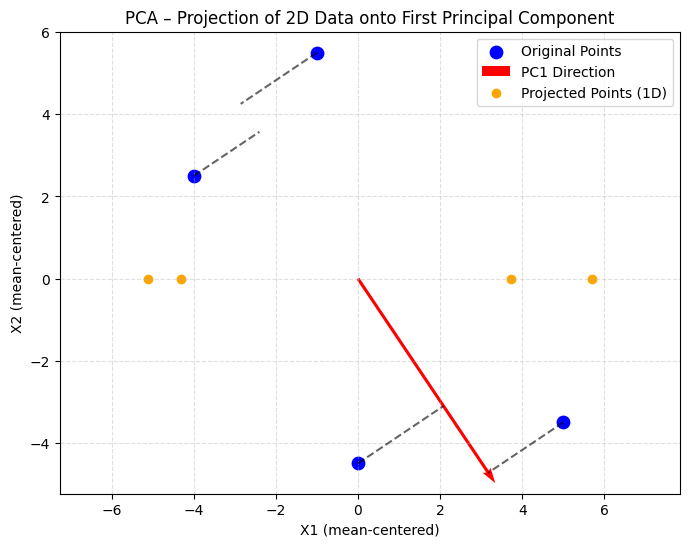

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.grid(True, linestyle="--", alpha=0.4)

# Calculate the projected points
projected_points = np.dot(X_meaned, W)

# Plot original mean-centered data
plt.scatter(X_meaned['X1'], X_meaned['X2'], color='blue', label='Original Points', s=80)

# Plot the principal component line (direction)
origin = np.zeros(2)
vector = W[:, 0] * 6  # scaled for visibility
plt.quiver(*origin, *vector, angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='PC1 Direction')

# Plot projections of data points onto the principal component
for i in range(len(Z)):
    # To project onto the line, we need to calculate the actual 2D coordinates on the line
    # The projected point on the line is the origin + the scalar projection along the vector W
    projected_2d = origin + projected_points[i] * W.flatten()
    plt.plot([X_meaned.iloc[i, 0], projected_2d[0]],
             [X_meaned.iloc[i, 1], projected_2d[1]], 'k--', alpha=0.6)
plt.scatter(projected_points[:, 0], np.zeros_like(projected_points[:, 0]), color='orange', label='Projected Points (1D)')


# Axis setup
plt.xlabel("X1 (mean-centered)")
plt.ylabel("X2 (mean-centered)")
plt.title("PCA – Projection of 2D Data onto First Principal Component")
plt.legend()
plt.axis('equal')
plt.show()